## https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/

In [16]:
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [45]:
# importando dataset
titanic = pd.read_csv("/Users/victormac/PROYECTOS/Cursos y talleres FORMACIÓN/Formación DATA SCIENCE/Ejercicios casuales Python/titanic.csv")

In [47]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
# tabla de frecuencia de clases de pasajeros
print(pd.value_counts(titanic['Pclass']))
print(pd.value_counts(titanic['Sex']))
print (np.mean(titanic['Age']))

3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
29.69911764705882


In [24]:
# tabla de frecuencia relativa de pasajeros
100 * titanic['Pclass'].value_counts() / len(titanic['Pclass'])

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

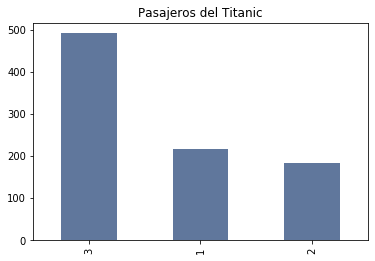

In [30]:
plot = titanic['Pclass'].value_counts().plot(kind='bar', title='Pasajeros del Titanic')

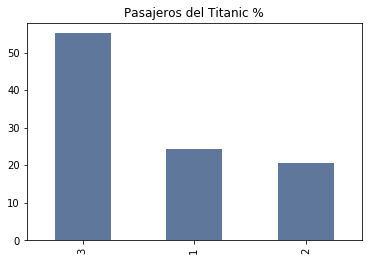

In [28]:
# gráfico de barras de frecuencias relativas.
plot = (100 * titanic['Pclass'].value_counts() / len(titanic['Pclass'])).plot(
kind='bar', title='Pasajeros del Titanic %')

In [31]:
# Tabla de contingencia class / survived
pd.crosstab(index=titanic['Survived'],
            columns=titanic['Pclass'], margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [33]:
# tabla de contingencia en porcentajes relativos total
#porcentaje que conseguió sobrevivir respecto al total, se ve que un 41% que murieron eran de tercera clase
pd.crosstab(index=titanic['Survived'], columns=titanic['Pclass'],
            margins=True).apply(lambda r: r/len(titanic) *100,
                                axis=1)

Pclass,1,2,3,All
Survived,,,,
0,8.978676,10.886644,41.750842,61.616162
1,15.263749,9.764310,13.355780,38.383838
All,24.242424,20.650954,55.106622,100.000000


In [35]:
# tabla de contingencia en porcentajes relativos segun clase
# Porcentaje que consiguió sobrevivir dentro de cada clase, se ve que sobrevivieron más de clase alta.
pd.crosstab(index=titanic['Survived'], columns=titanic['Pclass']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


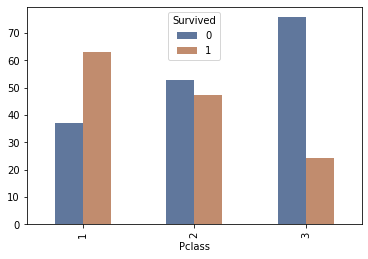

In [36]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['Pclass'],
            columns=titanic['Survived']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

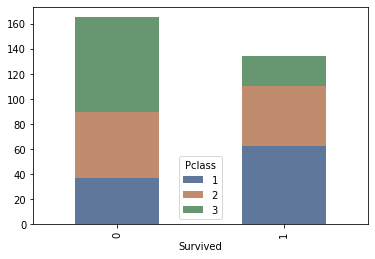

In [37]:
# Gráfico de barras de sobreviviviente segun edad
# Hayq ue agrupar edades: http://ligdigonzalez.com/agrupando-los-datos-con-python/
plot = pd.crosstab(index=titanic['Survived'],
            columns=titanic['Pclass']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

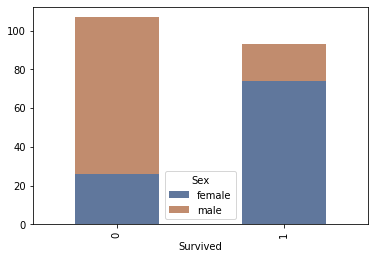

In [38]:
# Gráfico de barras de sobreviviviente segun sexo
plot = pd.crosstab(index=titanic['Survived'],
            columns=titanic['Sex']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [48]:
bins = [0, 5, 12, 18, 35, 60, 100] #Rangos de edad
names = ["1", "2", "3", "4", "5", "6"] #labels
#Cambio el tipo de datos en la columna Edad
titanic['Age'] = titanic['Age'].astype(float)
#categoriza en rangos los datos
titanic['Age'] = pd.cut(titanic['Age'], bins, labels = names)
# Esto reemplaza los valores de donde no hay valores por el numero que yo quiera
titanic['Age']= titanic['Age'].replace(np.nan, 9, regex=True)


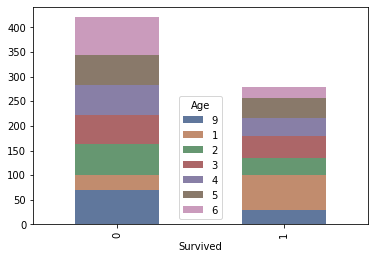

In [49]:
# Gráfico de barras de sobreviviviente segun sexo
plot = pd.crosstab(index=titanic['Survived'],
            columns=titanic['Age']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)



## Probando los PLOT

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("/Users/victormac/PROYECTOS/REPOS/REPOS-Github/Ejercicios-casuales/titanic.csv")
df_titanic.shape
df_titanic.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


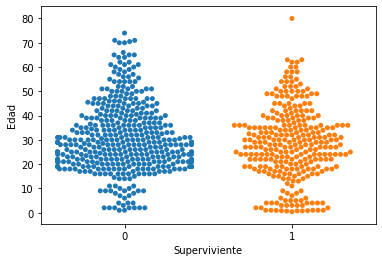

None


In [18]:
plot1 = sns.swarmplot(x = 'Survived', y = 'Age', data = df_titanic)
plot1 = plt.xlabel('Superviviente')
plot1 = plt.ylabel('Edad')
print(plt.show())

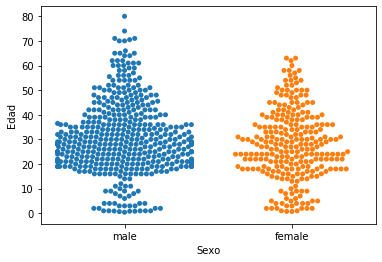

None


In [20]:
plot1 = sns.swarmplot(x = 'Sex', y = 'Age', data = df_titanic)
plot1 = plt.xlabel('Sexo')
plot1 = plt.ylabel('Edad')
print(plt.show())

TypeError: __init__() got an unexpected keyword argument 'bc'

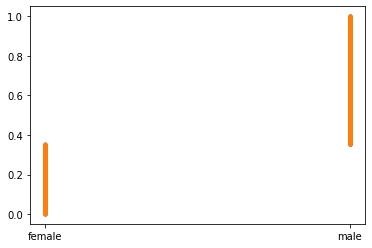

In [28]:
#No sale!!!!
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def ecdf(data):
    xs = np.sort(data)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

x_male, y_male = ecdf (df_titanic ['Sex'])
x_female, y_female = ecdf (df_titanic ['Sex'])

plot1 = plt.plot(x_male, y_male, marker = '.', linestyle = 'none')
plot1 = plt.plot(x_female, y_female, marker = '.', linestyle = 'none')

plot1 = plt.legend ('male', 'female', bc = 'lowerright')
plot1 = plt.xlabel('Superviviente')
plot1 = plt.ylabel('ECDF')
plt.show()



## Probando la exploración cuantitativa

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("/Users/victormac/PROYECTOS/REPOS/MDS/REPOS-Github/Ejercicios-casuales/titanic.csv")
df_titanic.shape
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# media edad
mean_age = np.mean(df_titanic['Age'])
median_age = np.nanmedian (df_titanic['Age']) # el nanmedian quita los valores nan de la tabla antes de hacer la operación, porque si no, no sale.
print(mean_age, ",", median_age)

# media edad solo de los hombres y mujeres y la cantidad de valores de cada uno
males = df_titanic[df_titanic['Sex'] == 'male']
females = df_titanic[df_titanic['Sex'] == 'female']
mean_age_male= np.mean (males['Age'])
mean_age_female= np.mean (females['Age'])
print(mean_age_male)
print(pd.value_counts(males['Sex']))
print(mean_age_female)
print(pd.value_counts(females['Sex']))
        

29.69911764705882 , 28.0
30.72664459161148
male    577
Name: Sex, dtype: int64
27.915708812260537
female    314
Name: Sex, dtype: int64


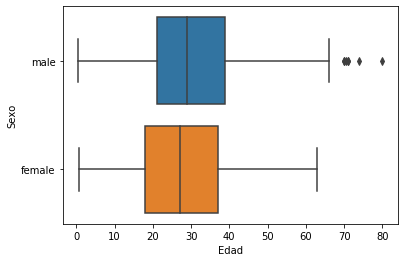

8


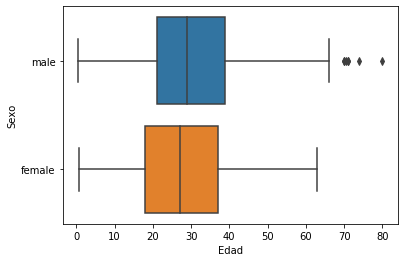

In [12]:
# crear gráfico con percentiles
np.nanpercentile(df_titanic ['Age'], [25, 50, 75])
graf_percen = sns.boxplot (x = 'Age', y = 'Sex', data = df_titanic)
graf_percen = plt.xlabel('Edad')
graf_percen = plt.ylabel('Sexo')
plt.show()

# ¿Cuántos mayores de 65 años varones hay?
print(sum(males['Age'] > 65))

# Percentil quitando estas personas mayores
np.nanpercentile(df_titanic ['Age'], [25, 50, 75])
graf_percen = sns.boxplot (x = 'Age', y = 'Sex', data = df_titanic)
graf_percen = plt.xlabel('Edad')
graf_percen = plt.ylabel('Sexo')
plt.show()

     PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
12            13         0       3  Saundercock, Mr. William Henry  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1   

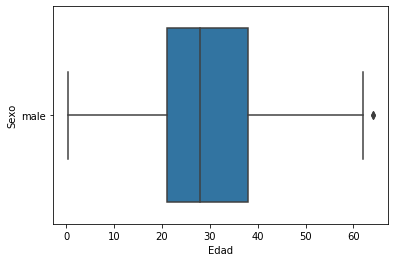

In [13]:
# Dataframe con sólo estos hombres menores de 65, que son 8
df_titanic_males_notold = males[males['Age'] < 65] #Recuerda poner: males[males[-----] para que 
#coja todo y no devuelva solo un boooleano!
print(df_titanic_males_notold)
print (sum(males['Age'] < 65))

# Box plot de lo anterior
graf_percen = sns.boxplot (x = 'Age', y = 'Sex', data = df_titanic_males_notold)
graf_percen = plt.xlabel('Edad')
graf_percen = plt.ylabel('Sexo')
plt.show()

In [18]:
%whos #Para ver todas las variables que hay

No variables match your requested type.


In [16]:
list(df_titanic) #ojo, coge la primera fila

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
for i, name in enumerate(df_titanic):
    print(f"Número {i}: {name}")

Número 0: PassengerId
Número 1: Survived
Número 2: Pclass
Número 3: Name
Número 4: Sex
Número 5: Age
Número 6: SibSp
Número 7: Parch
Número 8: Ticket
Número 9: Fare
Número 10: Cabin
Número 11: Embarked
